### TimML test line-sink discharge

In [1]:
from pylab import *
from timml import *

In [2]:
ml1 = ModelMaq(kaq=20)
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = LineSinkBase(ml1, x1=-10, y1=-10, x2=10, y2=10, Qls=1000)
ml1.solve()

Number of elements, Number of equations: 2 , 1
..
solution complete


In [3]:
print('head at center of line-sink:', ml1.head(ls1.xc, ls1.yc))
print('discharge of line-sink:', ls1.discharge())

head at center of line-sink: [19.19104524]
discharge of line-sink: [1000.]


In [4]:
ml2 = ModelMaq(kaq=20)
rf2 = Constant(ml2, xr=0, yr=20, hr=30)
N = 20
d = 20 / N
xw = np.arange(-10 + d/2, 10, d)
yw = np.arange(-10 + d/2, 10, d)
for i in range(N):
    Well(ml2, xw[i], yw[i], Qw=1000 / N)
ml2.solve(silent=True)

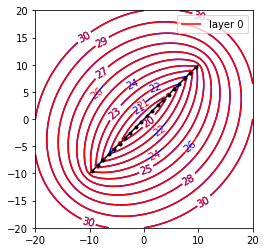

In [5]:
ml1.contour([-20, 20, -20, 20], 50, [0], np.arange(20, 31, 1), color='b')
ml2.contour([-20, 20, -20, 20], 50, [0], np.arange(20, 31, 1), color='r', newfig=False)

In [6]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = HeadLineSink(ml1, -10, -10, 10, 10, 20, order=7, layers=0)
ml1.solve()

Number of elements, Number of equations: 2 , 9
..
solution complete


In [7]:
ml2 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf2 = Constant(ml2, xr=0, yr=20, hr=30)
N = 50
d = 20 / N
xw = np.arange(-10 + d/2, 10, d)
yw = np.arange(-10 + d/2, 10, d)
for i in range(N):
    HeadWell(ml2, xw[i], yw[i], 20, layers=0)
ml2.solve(silent=True)
Qwell = 0
for i in range(N):
    Qwell += ml2.elementlist[i + 1].discharge()

In [8]:
print('discharge of line-sink:', ls1.discharge())
print('discharge of wells:', Qwell)

discharge of line-sink: [9430.28968599    0.        ]
discharge of wells: [9527.67795022    0.        ]


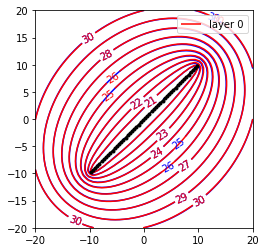

In [9]:
ml1.contour([-20, 20, -20, 20], 50, [0], np.arange(20, 31, 1), color='b')
ml2.contour([-20, 20, -20, 20], 50, [0], np.arange(20, 31, 1), color='r', newfig=False)

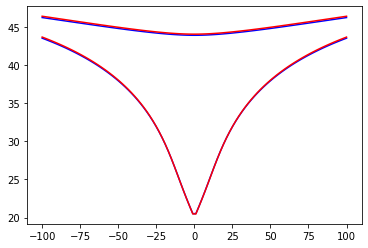

In [10]:
x = linspace(-100, 100, 100)
h1 = ml1.headalongline(x, 0)
h2 = ml2.headalongline(x, 0)
figure()
plot(x, h1.T, 'b')
plot(x, h2.T, 'r')

### Resistance line-sink

In [11]:
ml = ModelMaq(kaq=3)
ls = HeadLineSink(ml, -10, 0, 10, 0, wh=1, res=2, order=2)
rf = Constant(ml, 0, 20, 2)
ml.solve()

Number of elements, Number of equations: 2 , 4
..
solution complete


In [12]:
for i in range(3):
    print((ml.head(ls.xc[i], ls.yc[i]) - ls.hc) * ls.wh / ls.res)
    print(np.sum(ls.strengthinf[i] * ls.parameters[:, 0]))

[0.2856123 0.2856123 0.2856123]
0.2856122982149647
[0.25423528 0.25423528 0.25423528]
0.25423527855287226
[0.2856123 0.2856123 0.2856123]
0.2856122982149647


In [13]:
ml = ModelMaq(kaq=[1, 2], z=[20, 10, 10, 0], c=[1000])
lslayer = 0
order = 2
ls = HeadLineSink(ml, -10, 0, 10, 0, order=order, wh=1, res=2, layers=[lslayer])
rf = Constant(ml, 0, 20, 2)
ml.solve()
for i in range(order + 1):
    print((ml.head(ls.xc[i], ls.yc[i]) - ls.hc[i])[lslayer] * ls.wh / ls.res)
    print(np.sum(ls.strengthinf[i] * ls.parameters[:, 0]))

Number of elements, Number of equations: 2 , 4
..
solution complete
0.40780978626013675
0.40780978626013675
0.3916916792381697
0.3916916792381697
0.40780978626013675
0.40780978626013675


In [14]:
ml = ModelMaq(kaq=[1, 2], z=[20, 12, 10, 0], c=[1000])
order = 2
ls = HeadLineSink(ml, -10, 0, 10, 0, order=order, hls=1, wh=1, res=2, layers=[0, 1])
rf = Constant(ml, 0, 2000, 2)
ml.solve()
for i in range(order + 1):
    for ilay in range(2):
        print(((ml.head(ls.xc[i], ls.yc[i]) - ls.hc[i]) * ls.wh / ls.res)[ilay])
        print(np.sum(ls.strengthinf[2 * i + ilay] * ls.parameters[:, 0]))

Number of elements, Number of equations: 2 , 7
..
solution complete
0.2543605567219017
0.25436055672190183
0.3240182149654848
0.32401821496548505
0.2420139224290776
0.24201392242907746
0.3171900511929586
0.31719005119295945
0.2543605567219017
0.2543605567219018
0.3240182149654848
0.3240182149654837


In [15]:
print(ml.headalongline(ls.xc, ls.yc))
print(ls.hc)

[[1.50872111 1.48402784 1.50872111]
 [1.64803643 1.6343801  1.64803643]]
[1. 1. 1. 1. 1. 1.]


### Specifying heads along line-sinks

Give one value that is applied at all control points

In [16]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = HeadLineSink(ml1, -10, 0, 10, 0, hls=20, order=2, layers=[0])
ml1.solve()
print(ml1.headalongline(ls1.xc, ls1.yc))

Number of elements, Number of equations: 2 , 4
..
solution complete
[[20.         20.         20.        ]
 [39.70195661 39.68141013 39.70195661]]


Give `order + 1` values, which is applied at the `order + 1` control points. This may not be so useful, as the user needs to know where those control points are. 

In [17]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = HeadLineSink(ml1, -10, 0, 10, 0, hls=[20, 19, 18], order=2, layers=[0])
ml1.solve()
print(ml1.headalongline(ls1.xc, ls1.yc))

Number of elements, Number of equations: 2 , 4
..
solution complete
[[20.         19.         18.        ]
 [40.67787467 40.64955115 40.66642986]]


In [18]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = HeadLineSink(ml1, -10, 0, 10, 0, hls=[19, 20], order=2, layers=[0])
ml1.solve()
print(ml1.headalongline(ls1.xc, ls1.yc))

Number of elements, Number of equations: 2 , 4
..
solution complete
[[19.14644661 19.5        19.85355339]
 [40.18503126 40.16548064 40.18907761]]


### LineSinkDitch

In [19]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = LineSinkDitch(ml1, -10, -10, 10, 10, Qls=1000, order=2, layers=[0])
ml1.solve()
print(ml1.headalongline(ls1.xc, ls1.yc))
print(ls1.discharge())

Number of elements, Number of equations: 2 , 4
..
solution complete
[[28.88125027 28.88125027 28.88125027]
 [31.48813033 31.48283117 31.48813033]]
[1000.    0.]


In [20]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = LineSinkDitch(ml1, -10, -10, 10, 10, Qls=1000, order=2, layers=[0, 1])
ml1.solve()
print(ml1.headalongline(ls1.xc, ls1.yc))
print(ls1.discharge())

Number of elements, Number of equations: 2 , 7
..
solution complete
[[29.30489961 29.30489961 29.30489961]
 [29.30489961 29.30489961 29.30489961]]
[615.38461538 384.61538462]


### Head line-sink string

Number of elements, Number of equations: 2 , 19
..
solution complete


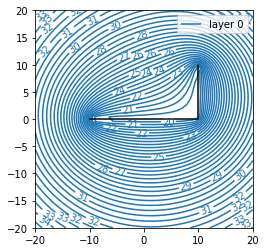

In [21]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = HeadLineSinkString(ml1, xy=[(-10, 0), (0, 0), (10, 0), (10, 10)], hls=20, order=5, layers=[0])
ml1.solve()
ml1.contour([-20, 20, -20, 20], 50, [0], 40)

Number of elements, Number of equations: 2 , 19
..
solution complete


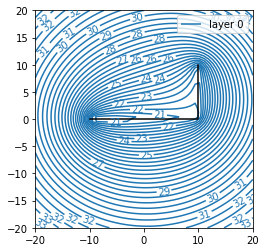

In [22]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = HeadLineSinkString(ml1, xy=[(-10, 0), (0, 0), (10, 0), (10, 10)], hls=[20, 22], order=5, layers=[0])
ml1.solve()
ml1.contour([-20, 20, -20, 20], 50, [0], 40)

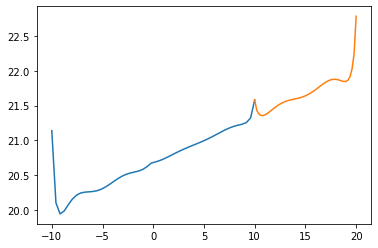

In [23]:
xls1 = np.linspace(-10, 10, 50)
yls1 = np.linspace(0, 0, 50)
hls1 = ml1.headalongline(xls1, yls1)
figure()
plot(xls1, hls1[0])
xls2 = np.linspace(10, 10, 50)
yls2 = np.linspace(0, 10, 50)
hls2 = ml1.headalongline(xls2, yls2)
plot(10 + yls2, hls2[0])

In [24]:
for ls in ls1.lslist:
    print(ml1.headalongline(ls.xc, ls.yc)[0])
    print(ls.hc)

[20.03301038 20.1255034  20.25915969 20.40750698 20.54116327 20.63365629]
[20.03301038 20.1255034  20.25915969 20.40750698 20.54116327 20.63365629]
[20.69967704 20.79217007 20.92582636 21.07417364 21.20782993 21.30032296]
[20.69967704 20.79217007 20.92582636 21.07417364 21.20782993 21.30032296]
[21.36634371 21.45883673 21.59249302 21.74084031 21.8744966  21.96698962]
[21.36634371 21.45883673 21.59249302 21.74084031 21.8744966  21.96698962]


### add resistance

In [25]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=200, hr=2)
ls1 = HeadLineSinkString(ml1, xy=[(-10, 0), (0, 0), (10, 0), (10, 10)], hls=[0, 1], 
                          res=2, wh=5, order=5, layers=[0])
ml1.solve()

Number of elements, Number of equations: 2 , 19
..
solution complete


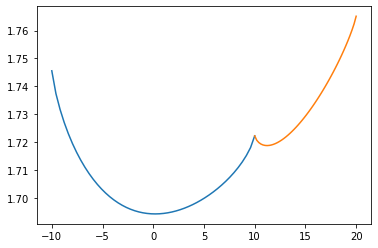

In [26]:
xls1 = np.linspace(-10, 10, 50)
yls1 = np.linspace(0, 0, 50)
hls1 = ml1.headalongline(xls1, yls1)
figure()
plot(xls1, hls1[0])
xls2 = np.linspace(10, 10, 50)
yls2 = np.linspace(0, 10, 50)
hls2 = ml1.headalongline(xls2, yls2)
plot(10 + yls2, hls2[0])

In [27]:
for ls in ls1.lslist:
    print(ml1.headalongline(ls.xc, ls.yc)[0])
    print(ls.hc)

[1.73602412 1.72073514 1.70756748 1.69921682 1.69538532 1.69430481]
[0.01650519 0.0627517  0.12957984 0.20375349 0.27058163 0.31682814]
[1.6942036  1.69490578 1.69752156 1.70261389 1.70968187 1.71733187]
[0.34983852 0.39608503 0.46291318 0.53708682 0.60391497 0.65016148]
[1.71953228 1.71919368 1.72456317 1.73498698 1.74775754 1.75930814]
[0.68317186 0.72941837 0.79624651 0.87042016 0.9372483  0.98349481]


In [28]:
ls.res

2

### Ditch string

In [29]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=1)
ls1 = LineSinkDitchString(ml1, xy=[(-10, 0), (0, 0), (10, 0)], Qls=100, wh=2, res=5, order=2, layers=[0])
ml1.solve()
print('discharge:', ls1.discharge())

Number of elements, Number of equations: 2 , 7
..
solution complete
discharge: [100.   0.]


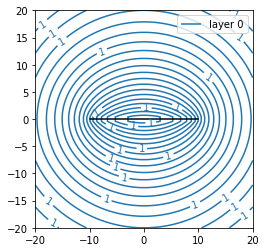

In [30]:
ml1.contour([-20, 20, -20, 20], 50, [0], 20)

### Ditch in different layers

In [31]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=1)
ls1 = LineSinkDitchString(ml1, xy=[(-10, 0), (0, 0), (10, 0), (10, 20)], Qls=100, wh=2, res=5, order=2, layers=[0,1,0])
ml1.solve()

Number of elements, Number of equations: 2 , 10
..
solution complete


### Angle well

In [32]:
ml = Model3D(kaq=1, z=np.arange(10, -0.1, -0.2), kzoverkh=0.1, topboundary='semi', topres=0, topthick=2, hstar=7)
xy = list(zip(np.linspace(-10, 10, 21), np.zeros(21)))
ls = LineSinkDitchString(ml, xy=xy, Qls=100, wh=2, res=5, order=2, layers=np.arange(10, 30, 1))
ml.solve()

Number of elements, Number of equations: 2 , 60
..
solution complete


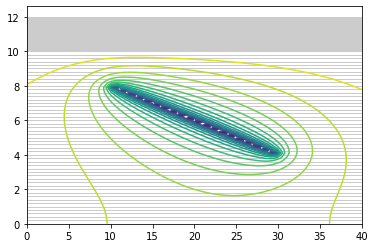

In [33]:
ml.vcontour([-20, 20, 0, 0], 100, 20)